# Analysis on the `tips` dataset

In [0]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
#!pip3 install --upgrade seaborn # Updates the seaborn version in the collab notebook.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The tips dataset contains 7 columns:
- `total_bill` which is the total amount spent at the restaurant
- `tip` which is the tip left on top of the `
- `sex` of the customer
- `smoker` Yes if the customers were smokers or No if not
- `day` of the which the meal took place
- `time` of the day it happened
- `size` which is the number of people at the table

In [0]:
sns.set(style="whitegrid")

tips = sns.load_dataset("tips")

In [0]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


**Which questions can we ask ourselves regarding this dataset ?** 

Think about what you want to *model*

*   *Change over time*
*   **Comparison** 
*  **Part of a whole**
* **A Correlation**
*  **Ranking**
*  **Distribution**
* *Flows and relationships*
* *Geospatial*




##**Analytical thinking exercise** 

It is not about coding it is about thinking and questionning

- Find 3 questions you would want to answer using this dataset and put them in the corresponding `model bucket` 




* Do smokers tip more than non smokers? > Comparison
* Is the size of the group impacting the tipping? > correlation
* Is there more tips on Sunday VS saturday ? > Comparison, change over time if we had the true
* Distribution of proportion of tip VS the total amount > distribution


## Comparison and Correlation plots with Seaborn

So what would we want to compare here ? 

We could compare how much money was spent given the day of the week or the time of the time for example.

### **Bar plots example of comparison plot with Seaborn**

https://seaborn.pydata.org/generated/seaborn.barplot.html?highlight=barplot#seaborn.barplot

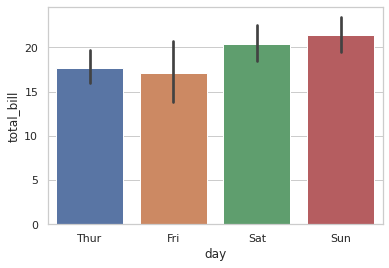

In [0]:
sns.barplot(x='day', 
            y='total_bill', 
            data=tips);

In [0]:
tips.groupby(['day','sex'])['total_bill'].mean()

day   sex   
Thur  Male      18.714667
      Female    16.715312
Fri   Male      19.857000
      Female    14.145556
Sat   Male      20.802542
      Female    19.680357
Sun   Male      21.887241
      Female    19.872222
Name: total_bill, dtype: float64

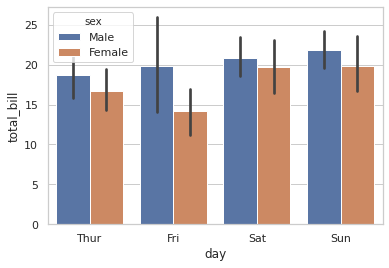

In [0]:
sns.barplot(x='day', 
            y='total_bill', 
            hue='sex', # here we passed the sex as hue, which means every bar will be divided by Male and Female for each day of the week
            data=tips);

### **Scatter plots example of relation plots with Seaborn**

https://seaborn.pydata.org/generated/seaborn.scatterplot.html?highlight=scatterplot#seaborn.scatterplot

We could ask ourselves is there a correlation between the price of the meal and the tip?

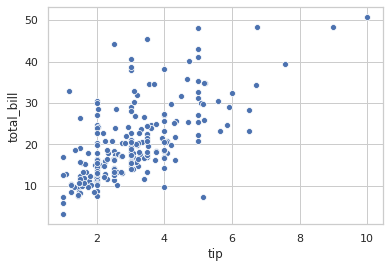

In [0]:
sns.scatterplot(x='tip', 
                y='total_bill', 
                data=tips);

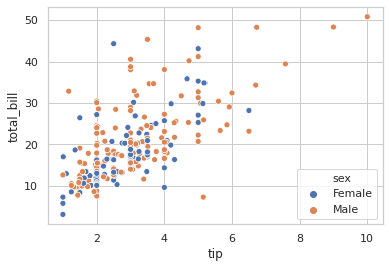

In [0]:
sns.scatterplot(x='tip', 
                y='total_bill', 
                hue='sex', # Here the females and males will be plotted in different colors
                data=tips);

## **Exercise**

*   Plot a graph comparing the `tip` given the `time` of the day. What do you understand from this graph?
*   Plot a relationship graph between the number of person of the table `size` and the `total_bill`




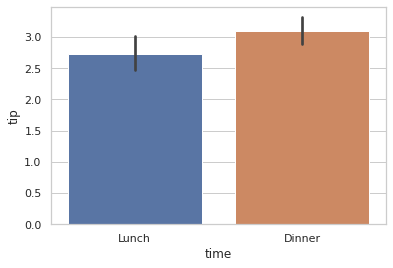

In [0]:
sns.barplot(x='time',
            y='tip',
            data=tips)

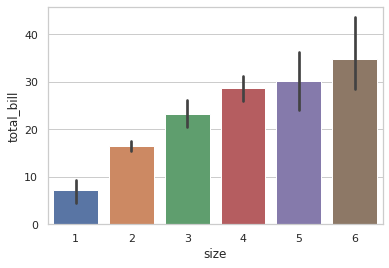

In [0]:
sns.barplot(x='size',
                y='total_bill',
                data=tips)

## Distribution plots with Seaborn

Distribution plots enable you to understand what is the shape of your data. 

*  For example we could ask ourselves how are the tips distributed and what are the expected values of a tip?




### Boxplot example of distribution plots with Seaborn

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

![Image of Yaktocat](https://cdn-images-1.medium.com/max/1600/1*8noddM5HrclQmqUU9U_dUw.png)


#### Median
The **median** is the value that separates the higher half of a data from the lower half. It’s calculated by the following steps: order your values, and find the middle one. 
For example, if we have the numbers 1, 3, 4, **7**, 8, 8, 9, the median will be 7.


#### First quartile
The first quartile is the median of the data values to the left of the median in our ordered values.
Ex: For the numbers 1, 3, 4, 7, 8, 8, 9, the first quartile will be ?

#### Third quartile
The third quartile is the median of the data values to the right of the median in our ordered values.
Ex: For the numbers 1, 3, 4, 7, 8, 8, 9, the Third quartile will be ?

#### Interquartile Range(IQR)
The IQR approximates the amount of spread in the middle 50% of the data. The formula is the third quartile - the first quartile.
Ex: For the numbers 1, 3, 4, 7, 8, 8, 9, the IQR will be ?


#### Outlier
An outlier is a data value that lies outside the overall pattern. A commonly used rule says that a value is an outlier if it’s less than the first quartile - 1.5 * IQR or high than the third quartile + 1.5 * IQR.

#### Maximum and Minimum
The minimum and the maximum are just the min and max values from our data. (outliers are not included)


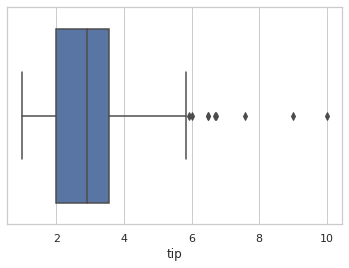

In [0]:
sns.boxplot(x='tip',
            data = tips)

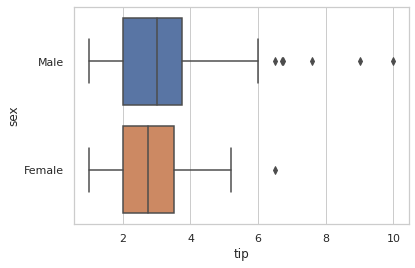

In [0]:
sns.boxplot(x='tip',
            y='sex', # Adding y here works as hue
            #hue='smoker', # You can add also another hue to have an even more granular comparison
            data = tips)

In [0]:
tips['tip_proportion'] = tips['tip']/tips['total_bill']

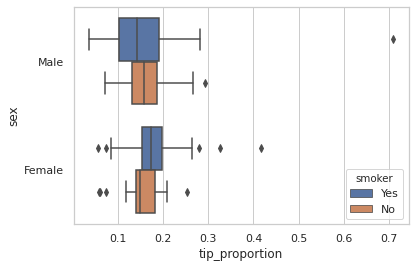

In [0]:
sns.boxplot(x='tip_proportion',
            y='sex', # Adding y here works as hue
            hue='smoker', # You can add also another hue to have an even more granular comparison
            data = tips)

### Histogram example of distribution plots with Seaborn

https://seaborn.pydata.org/tutorial/distributions.html

It is similar to a Bar Chart, but a histogram groups numbers into ranges .

The height of each bar shows how many fall into each range.

And you decide how many ranges <=> bins to use!

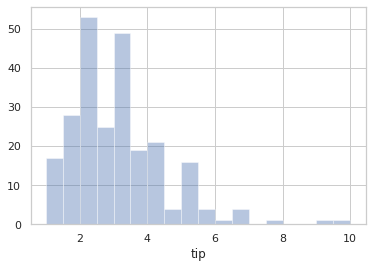

In [0]:
sns.distplot(tips['tip'], 
             kde = False
             );

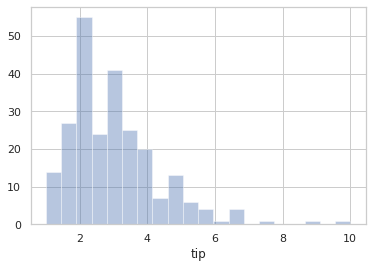

In [0]:
sns.distplot(tips['tip'], 
             bins=20,
             kde = False
             );

## **Exercise**
What is the range of money spent at the restaurant?
* Plot the boxplot of `total_bill`
* Plot the boxplots of `total_bill` for smokers and non smokers


## Exercises for homework on another dataset



`planets` is a new dataset from seaborn that we have never explored. You can find the code to run it in the cell below.

This file was produced by the NASA Exoplanet Archive  http://exoplanetarchive.ipac.caltech.edu
Sat Feb 15 11:18:19 2014

* `method`:              `Discovery Method`
* `number`:              `Number of Planets in System`
* `orbital_period`:      `Orbital Period (val)`
* `mass`:                `Planet M*sin(i) [jup] (val)`
* `distance`:            `Distance (val)`
* `year`:                `Year of Discovery`
---


This exercise will be voluntarily open ended with no clear guidelines on what is the best way to solve it to practice your `analytical thinking` mindset.

* Go through the dataset and ask yourself the most number of questions you can ask about the data.
* List them and try to convert these questions into hypothesis
* Then try to associate to this list of hypothesis one or two example of visualisations that could help you validate or invalidate the hypothesis

The exercise is open ended in order to make you experience your own questionning facing a fully new dataset.

**Enjoy <3** 



In [0]:
planets = sns.load_dataset('planets')

In [0]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


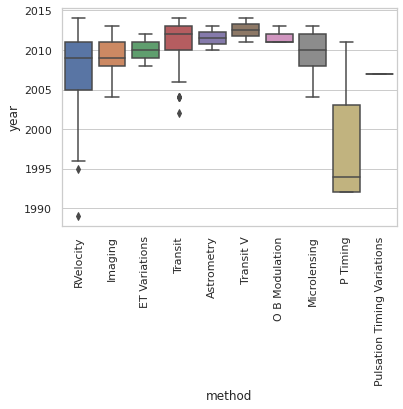

In [0]:
chart = sns.boxplot(x='method', 
            y='year',
            data=planets);
chart.set_xticklabels(['RVelocity', 
                       'Imaging', 
                       'ET Variations', 
                       'Transit', 
                       'Astrometry', 
                       'Transit V', 
                       'O B Modulation', 
                       'Microlensing',
                       'P Timing', 
                       'Pulsation Timing Variations'] , 
                      rotation=90);